#### IMDB DATA SET

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


In [ ]:
# Download the IMDB dataset
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Let see the data
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# find the length of the data
len(train_data[0]), len(train_data[1])

(218, 189)

#### Convert the integer back to words
It may be useful to know how to convert integers back to text. Here we'll create a helper function to query a dictionary object that contains the integer to string mapping.

In [ ]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Prepare the data
The reviews-the arrays of integers-must be converted to tensors before fed into the neural network. This conversion can be done a couple of ways:

* One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network-a Dense layer-that can handle floating point vector data. This approach is memory intensive, though, requiring a num words + num reviews size matrix.
* Alternatively, we can pad the arrays so they all have the same length, then create an integer tensor of shape num _examples * max Length. We can use an embedding layer capable of handling this shape as the first layer in our network.

In this tutorial, we will use the second approach.
Since the movie reviews must be the same length, we will use the **pad_sequences** function to standardize the lengths:

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
# Let's look at the length if the example  now
len(train_data[0]), len(train_data[1])

(256, 256)

### And inspect the (now padded) first review

In [ ]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### Build the Model

In [ ]:
# Create a Model
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the MODEL
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Spilt the data into train and test sets
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
# train the Model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5099 - loss: 0.6925 - val_accuracy: 0.5832 - val_loss: 0.6890
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6483 - loss: 0.6862 - val_accuracy: 0.6855 - val_loss: 0.6776
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7136 - loss: 0.6715 - val_accuracy: 0.6994 - val_loss: 0.6550
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7272 - loss: 0.6423 - val_accuracy: 0.7479 - val_loss: 0.6134
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7600 - loss: 0.5936 - val_accuracy: 0.7773 - val_loss: 0.5639
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7993 - loss: 0.5379 - val_accuracy: 0.8069 - val_loss: 0.5136
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8260 - loss: 0.4852 - val_accuracy: 0.8175 - val_loss: 0.4682
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8419 - loss: 0.4412 - val_accuracy: 0.8371 - v

In [ ]:
# Evaluate the mdoel on test data
model.evaluate(test_data, test_labels)
model

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8788 - loss: 0.3029


<Sequential name=sequential_2, built=True>

## create  a graph of accuracy and loss over time

In [ ]:
# Create a graph accuracy
history_dict = history.history
history_dict.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

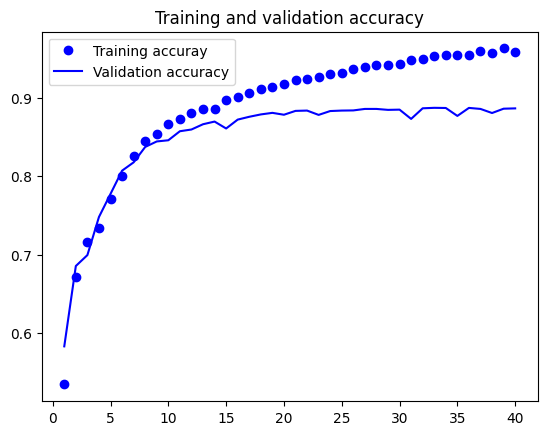

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuray")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()



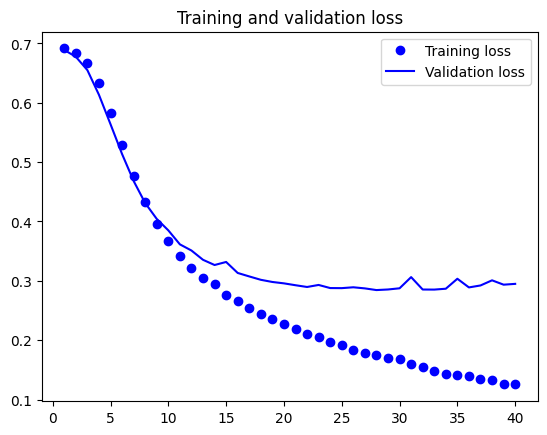

In [ ]:
plt.clf()   # clear figure
accuracy_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# Let's also test it against a couple of planned reviews
# One of them is a bunch of random words, and the other
# is the biased review we created earlier

rand_review = np.random.randint(10000, size=256)
biased_review = np.full(256, 530)
test_data = np.append(test_data, [rand_review], axis=0)
test_data = np.append(test_data, [biased_review], axis=0)


# And here is the predition
# It's an array of predictions for the tets_data at the particular
# Index, so let's manually look at the first few, as well as the
# one we planted on the end.
print(model.predict(test_data))
print(decode_review(test_data[-2]))
print(decode_review(test_data[-1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.07721221]
 [0.99705887]
 [0.79597086]
 ...
 [0.6998105 ]
 [0.30263612]
 [1.        ]]
billy like citizen stake france cheer gestures fell whose proudly united sticking tale 21st curiously charge extremely apartment item gypsy loud slimy marathon perceive everett symbolism dr sexuality misguided sneak colony we'll brain stripped prop solution driven 25 sammy lugosi advised salesman must've occupied came 500 rack border lend assortment smith's lays steam movement felt lucky sinatra incarnation time hook hadn't distracting generations buffs uniquely suburban sleuth species 99 daylight barbara ability proudly flashy addressed clever serve muppets fill thing smell comedic watched damage bros wont relationships affection gags sufficient meaningful absorbed government cerebral caused as conflict teacher balloon easier contemporary rizzo who've episode san underrated succeeded toby factors jimmy then sibling referred climatic gentleman ready directi